# Job Risques Cardio-Vasculaires

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cardio = pd.read_csv('cardio_train.csv', sep=';')
df_cardio = df_cardio.drop('id', axis=1)

In [3]:
df_cardio.shape

(70000, 12)

In [4]:
df_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


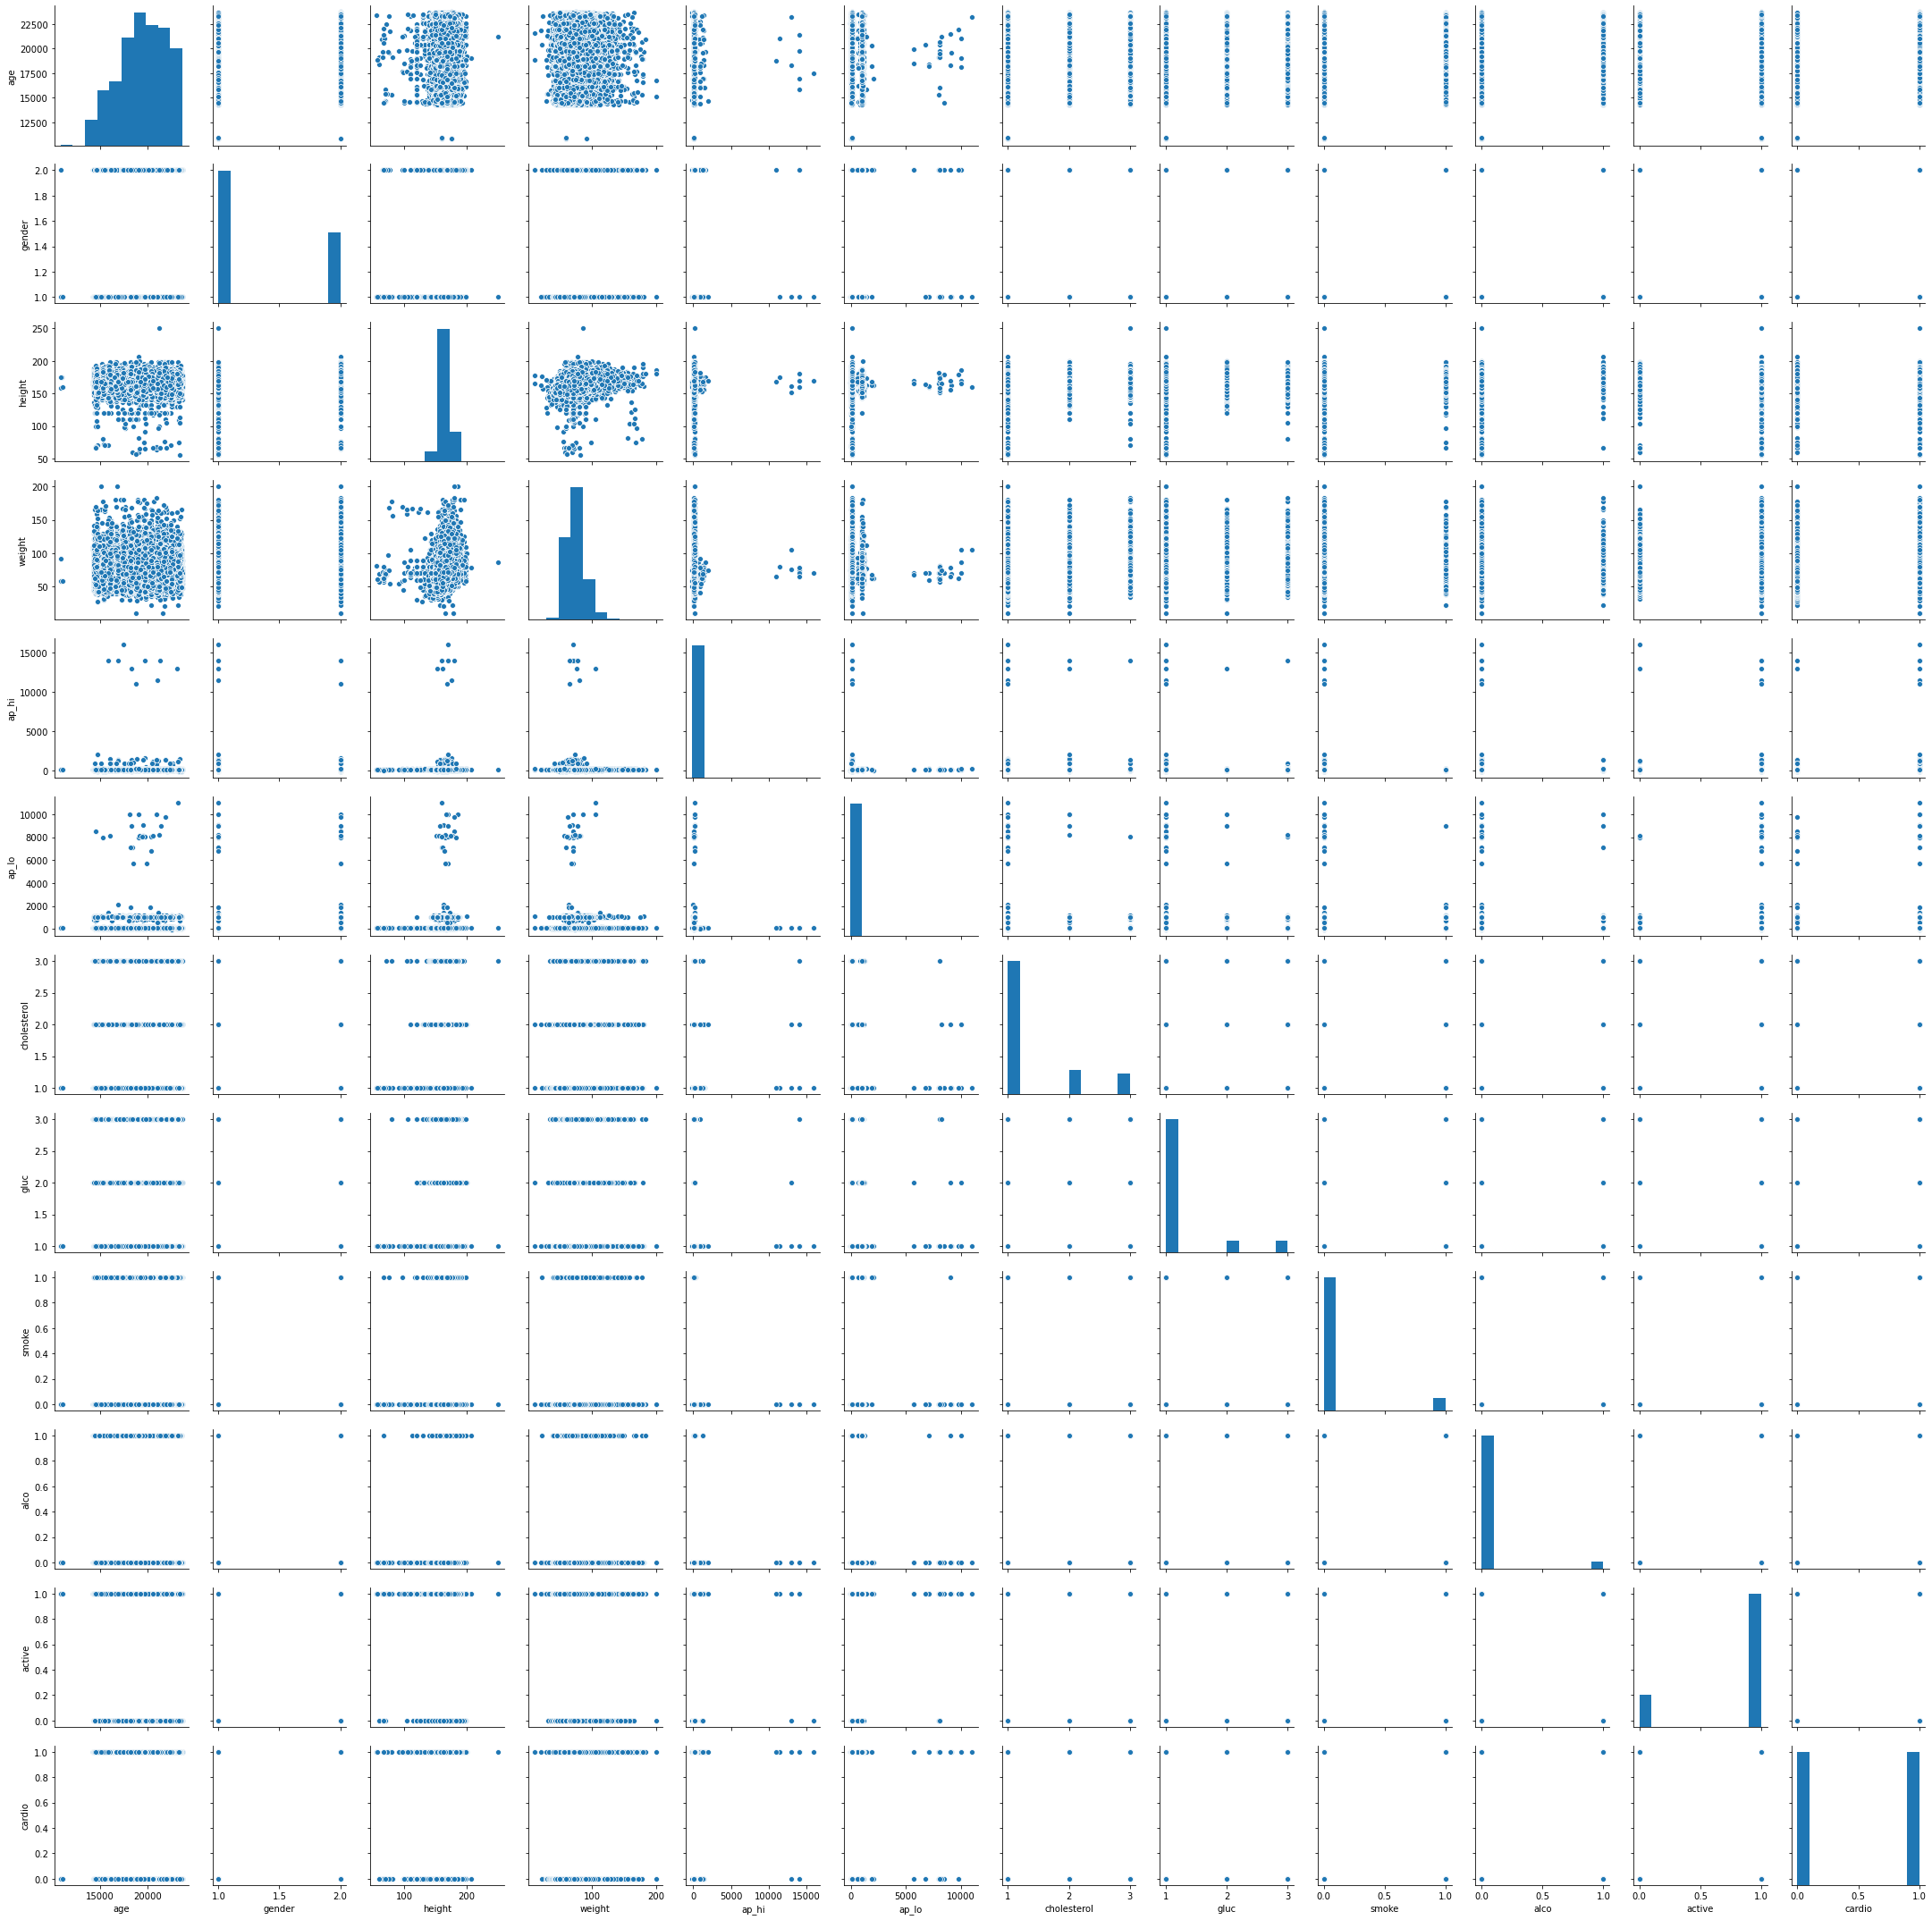

In [5]:
sns.pairplot(df_cardio)

In [6]:
df_cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [7]:
df_cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

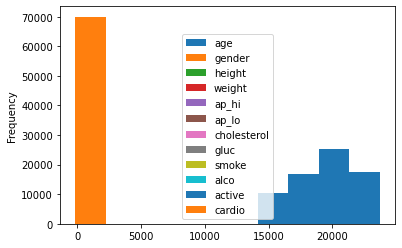

In [8]:
df_cardio.plot.hist()

In [9]:
# Dataset correlations
corrMatrix = df_cardio.corr(method="pearson")
corrMatrix

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


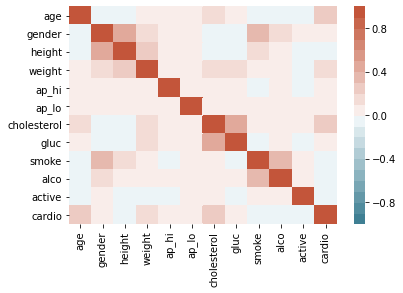

In [10]:
# Correlation matrix heatmap
sns.heatmap(corrMatrix, vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 20, n=20))
plt.show()

In [11]:
df_cardio['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

Les données semblent équilibrées.

<AxesSubplot:xlabel='cardio', ylabel='count'>

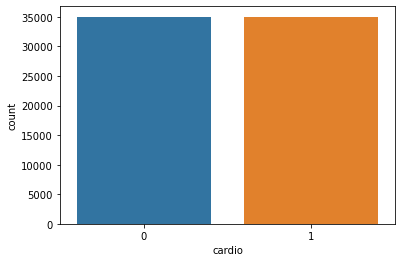

In [12]:
sns.countplot(x='cardio', data=df_cardio)

# Prédiction

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [14]:
df_cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [15]:
X = np.array(pd.DataFrame(df_cardio, columns=['age', 'weight', 'cholesterol']))
y = np.array(df_cardio['cardio']).ravel()

In [16]:
model = LogisticRegression(random_state=0)

In [17]:
model.fit(X, y)

LogisticRegression(random_state=0)

In [18]:
print('Intercept :',model.intercept_,'  ','Coeff',model.coef_)

Intercept : [-0.16145559]    Coeff [[-2.65442608e-05 -6.62546026e-05  5.49770851e-01]]


In [19]:
model.predict_proba(X)

array([[0.52598185, 0.47401815],
       [0.27983343, 0.72016657],
       [0.27228275, 0.72771725],
       ...,
       [0.27392333, 0.72607667],
       [0.55277009, 0.44722991],
       [0.40417557, 0.59582443]])

In [20]:
model.predict(X)

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [21]:
model.score(X, y)

0.5841285714285714

### Classification report

In [22]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.56      0.82      0.66     35021
           1       0.66      0.34      0.45     34979

    accuracy                           0.58     70000
   macro avg       0.61      0.58      0.56     70000
weighted avg       0.61      0.58      0.56     70000



### Confusion Matrix

Confusion matrix for Logistic Regression
[[28883  6138]
 [22973 12006]]

Normalized confusion matrix for Logistic Regression
[[0.82473373 0.17526627]
 [0.65676549 0.34323451]]



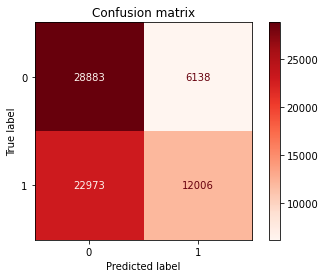

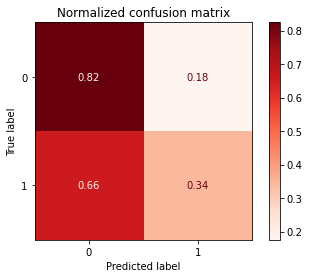

In [23]:
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X, y,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title,'for Logistic Regression')
    print(disp.confusion_matrix)
    print()

plt.show()

In [ ]:
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X, y,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax.set_title(title)

    print(title,'for Logistic Regression')
    print(disp.confusion_matrix)
    print()

plt.show()